# <center><font color = 'yellow'>PUBG Game Prediction</center>

<center><img src = "https://media1.tenor.com/images/82a585aa177c6eb399e2864a509147b3/tenor.gif?itemid=18625783"></center>

### Table Content
1. [Importing Libraries](#import)
2. [Reading Data](#reading)
3. [Data Wrangling](#wrangle)
4. [Feature Engineering](#feature)
5. [Catboost Model](#cat)

## 1.Importing Libraries <a class = 'anchor' id = 'import'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 2. Reading Data <a class = 'anchor' id = 'reading'>

In [2]:
# loading data

df = pd.read_csv('PUBG_Game_Prediction_data.csv')

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.shape

(4446966, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## 3. Data Wrangling <a class = 'anchor' id='wrangle'>

In [6]:
# checking null values
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
df[df['winPlacePerc'].isna()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df['playersjoined']=df.groupby(['matchId'])['matchId'].transform('count')

In [10]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


### Data Analysis

Removing players having kills more than zero with zero movement

In [11]:
df['totalDist'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

In [12]:
df['kills_without_moving'] = ((df['kills']>0) & (df['totalDist']==0))

In [13]:
df[df['kills_without_moving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersjoined,totalDist,kills_without_moving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [14]:
df.drop(df[df['kills_without_moving']==True].index , inplace=True)

In [15]:
df.drop('kills_without_moving',axis=1,inplace=True)

Removing extra ordinary road kills 

In [16]:
df[df['roadKills']>5].shape

(46, 31)

In [17]:
df.drop(df[df['roadKills']>5].index,inplace=True)

Total number of kills 

Text(0, 0.5, 'players_count')

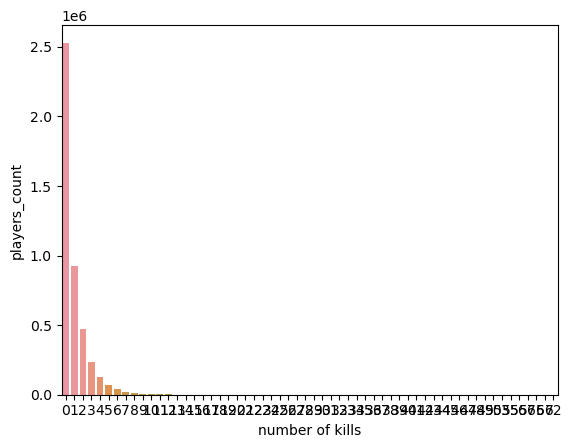

In [18]:
sns.countplot(data=df,x=df['kills'])
plt.xlabel('number of kills')
plt.ylabel('players_count')

Text(0, 0.5, 'players_count')

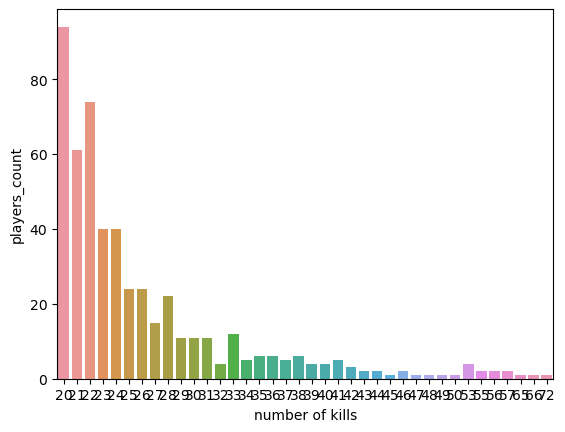

In [19]:
sns.countplot(data=df,x=df[df['kills']>=20]['kills'])
plt.xlabel('number of kills')
plt.ylabel('players_count')

In [20]:
df[df['kills']>20]['kills'].count()

417

In [21]:
df.drop(df[df['kills']>20].index,inplace=True)

Head shots

In [22]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'].fillna(0,inplace=True)

In [23]:
df[(df['headshot_rate']==1) & (df['kills']>5)]["Id"].count()

187

In [24]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>5)].index,inplace=True)

Longest kill

Text(9.444444444444445, 0.5, 'players count')

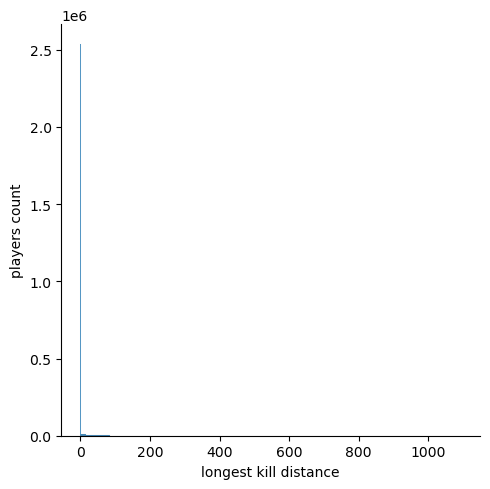

In [25]:
sns.displot(df['longestKill'])
plt.xlabel('longest kill distance')
plt.ylabel('players count')

In [26]:
df[df['longestKill']>=500].shape

(1738, 32)

In [27]:
df.drop(df[df['longestKill']>=500].index,inplace=True)

Weapons acquired

Text(0, 0.5, 'players count')

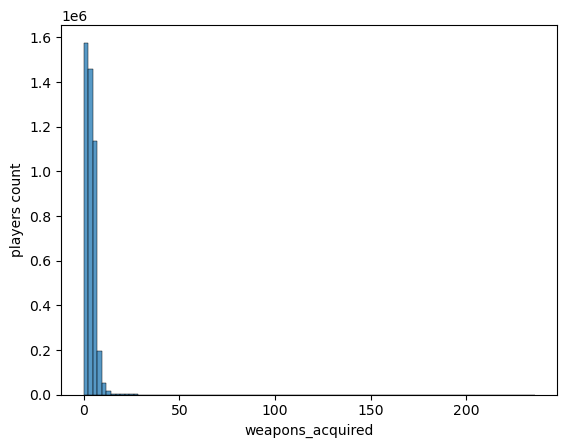

In [28]:
sns.histplot(df['weaponsAcquired'],bins=100)
plt.xlabel('weapons_acquired')
plt.ylabel('players count')

In [29]:
df[df['weaponsAcquired']>=15].shape

(6809, 32)

In [30]:
df.drop(df[df['weaponsAcquired']>=15].index,inplace=True)

EDA

In [31]:
df.shape

(4436233, 32)

In [32]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
playersjoined      0
totalDist          0
headshot_rate      0
dtype: int64

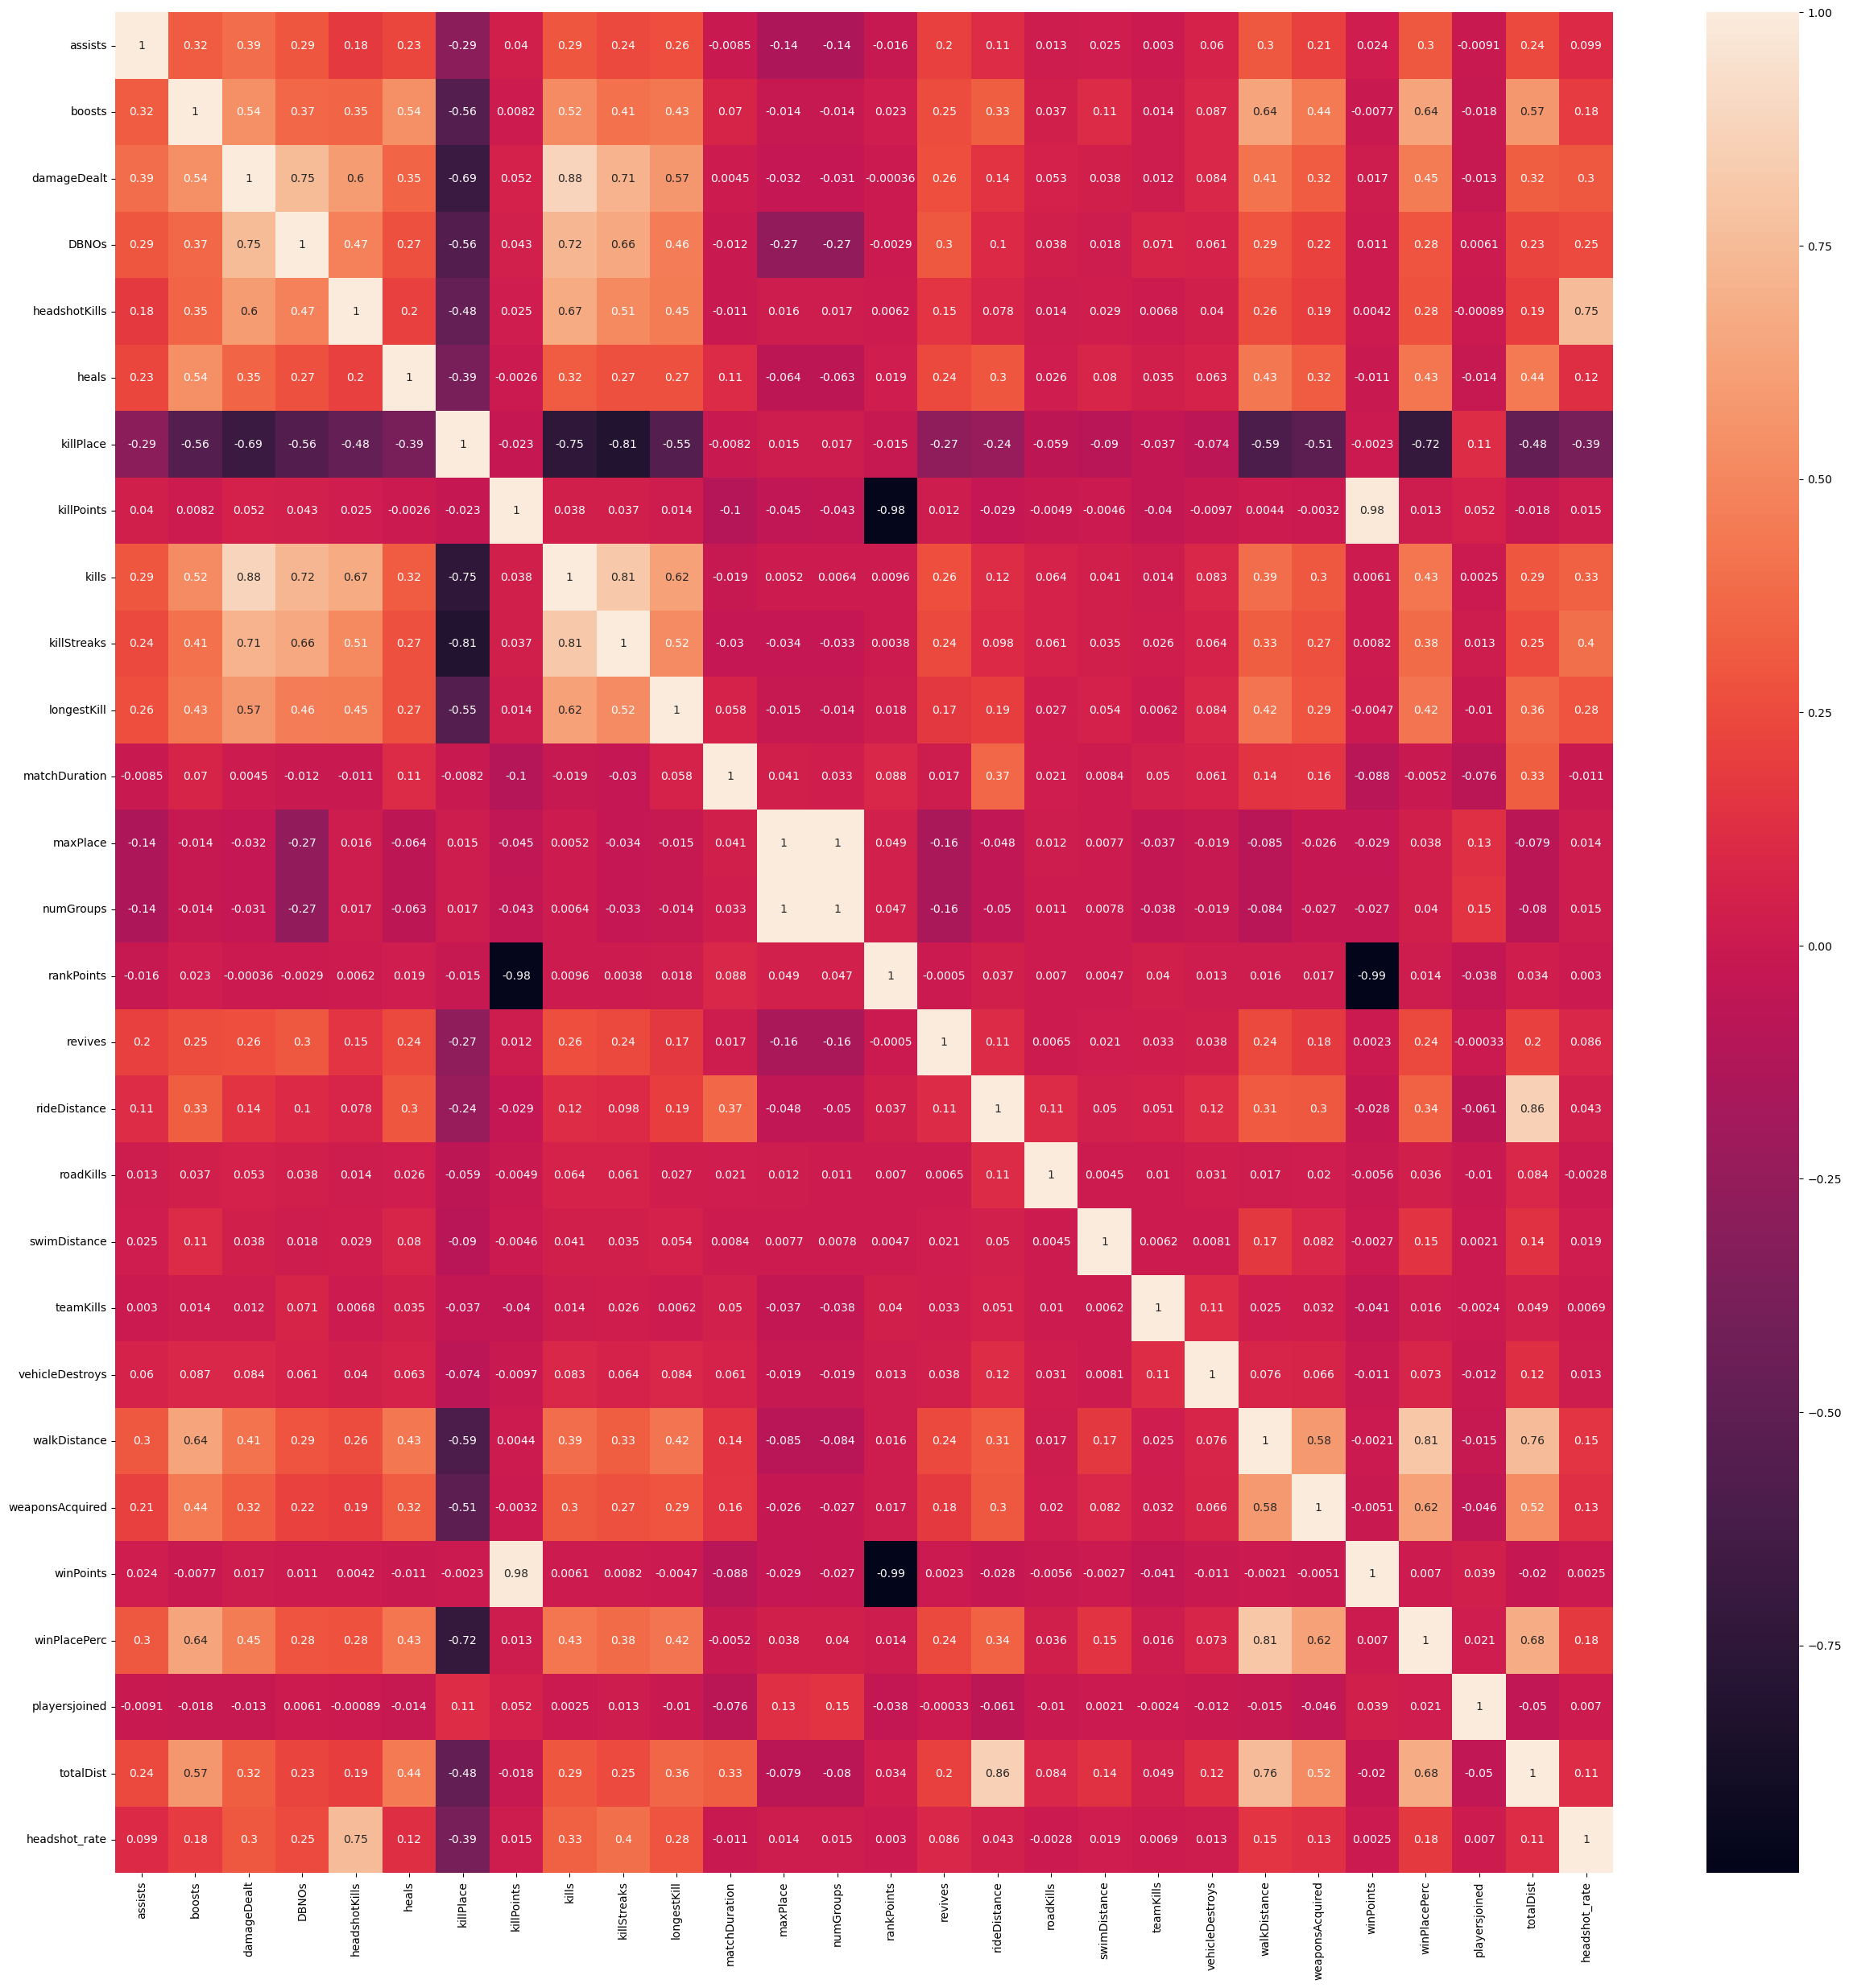

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

## 4. Feature Engineering <a class = 'anchor' id = 'feature'>

In [34]:
normalising_factor = (100-df['playersjoined'])/100 + 1

df['killsNorm'] = df['kills']*normalising_factor
df['damageDealtNorm'] = df['damageDealt']*normalising_factor
df['maxPlaceNorm'] = df['maxPlace']*normalising_factor
df['matchDurationNorm'] = df['matchDuration']*normalising_factor




In [35]:
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [36]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersjoined',
       'totalDist', 'headshot_rate', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'healsnboosts', 'assist'],
      dtype='object')

In [37]:
df.drop(columns=['Id','matchId','groupId','assists','boosts','walkDistance','swimDistance','rideDistance','heals','revives','kills','damageDealt','maxPlace','matchDuration'],inplace=True)

In [38]:
df.shape

(4436233, 24)

## 5. Catboost Model <a class = 'anchor' id = 'cat'>

Handling categorical data

In [39]:
df.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,winPlacePerc,playersjoined,totalDist,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,0.4444,96,244.8000,0.0,0.00,0.0000,29.12,1358.24,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,0.6400,91,1445.0445,0.0,0.00,99.7023,28.34,1936.93,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,0.7755,98,161.8000,0.0,0.00,69.3600,51.00,1344.36,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,0.1667,91,202.7000,0.0,0.00,35.8610,33.79,1565.24,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,0.1875,97,49.7500,0.0,1.03,103.0000,99.91,1466.72,0,0


In [40]:
x = df.drop('winPlacePerc',axis=1)
y = df['winPlacePerc']

In [41]:
x = pd.get_dummies(x,columns=['matchType'])

In [42]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
features = x.columns

In [44]:
df['matchType'].value_counts()

squad-fpp           1754740
duo-fpp              996001
squad                625292
solo-fpp             536212
duo                  313185
solo                 181456
normal-squad-fpp      13073
crashfpp               6274
normal-duo-fpp         5003
flaretpp               2497
normal-solo-fpp         845
flarefpp                717
crashtpp                367
normal-squad            305
normal-duo              144
normal-solo             122
Name: matchType, dtype: int64

Scaling data

In [45]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))


In [46]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.582948,-0.384165,0.449324,1.172491,-0.765121,-0.459623,-0.732885,-1.212390,-0.049567,-0.142507,...,-0.005697,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181
1,-0.582948,-0.384165,0.340033,-0.804728,-0.765121,-0.459623,-0.775859,0.803565,-0.049567,-0.142507,...,-0.005697,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181
2,-0.582948,-0.384165,-0.024272,-0.804728,-0.765121,-0.459623,0.169559,0.813067,-0.049567,-0.142507,...,-0.005697,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,-0.808943
3,-0.582948,-0.384165,0.995782,-0.804728,-0.765121,-0.459623,-0.560991,0.700391,-0.049567,-0.142507,...,-0.005697,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181
4,-0.582948,-0.384165,-0.097133,-0.804728,0.647737,0.727503,2.232287,0.906738,-0.049567,-0.142507,...,-0.005697,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,2.696902,-0.405066,-0.808943


Splitting Data

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [48]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(3105363, 38) (3105363,)
(1330870, 38) (1330870,)


CatBoost 

In [49]:
import catboost as cb

In [50]:
train_dataset = cb.Pool(xtrain,ytrain)
test_dataset = cb.Pool(xtest,ytest)

In [51]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [52]:
grid = {'iterations':[100,150],
        'learning_rate':[0.03,0.1],
        'depth':[2,4,6,8]}

model.grid_search(grid,train_dataset)

0:	learn: 0.5480947	test: 0.5486678	best: 0.5486678 (0)	total: 338ms	remaining: 33.5s
1:	learn: 0.5332335	test: 0.5337923	best: 0.5337923 (1)	total: 464ms	remaining: 22.8s
2:	learn: 0.5188574	test: 0.5194010	best: 0.5194010 (2)	total: 596ms	remaining: 19.3s
3:	learn: 0.5049659	test: 0.5054959	best: 0.5054959 (3)	total: 716ms	remaining: 17.2s
4:	learn: 0.4915396	test: 0.4920561	best: 0.4920561 (4)	total: 834ms	remaining: 15.8s
5:	learn: 0.4785110	test: 0.4790159	best: 0.4790159 (5)	total: 962ms	remaining: 15.1s
6:	learn: 0.4658878	test: 0.4663813	best: 0.4663813 (6)	total: 1.08s	remaining: 14.4s
7:	learn: 0.4536963	test: 0.4541775	best: 0.4541775 (7)	total: 1.21s	remaining: 13.9s
8:	learn: 0.4418864	test: 0.4423537	best: 0.4423537 (8)	total: 1.32s	remaining: 13.3s
9:	learn: 0.4304927	test: 0.4309460	best: 0.4309460 (9)	total: 1.44s	remaining: 12.9s
10:	learn: 0.4194859	test: 0.4199258	best: 0.4199258 (10)	total: 1.56s	remaining: 12.6s
11:	learn: 0.4087911	test: 0.4092218	best: 0.4092218

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [53]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by=['importance'],ascending=False)

In [54]:
feature_importance_df

,features,importance
2,killPlace,40.910441
14,totalDist,24.363508
16,killsNorm,8.319292
4,killStreaks,7.484641
19,matchDurationNorm,5.524036
13,playersjoined,4.181925
6,numGroups,2.409092
20,healsnboosts,2.056508
5,longestKill,1.189121
0,DBNOs,1.093093


Prediction

In [55]:
pred = model.predict(xtest)

In [62]:
rmse = np.sqrt(mean_squared_error(ytest,pred))
r2 = r2_score(ytest,pred)

print('Testing Performance')

print('RMSE:',rmse)
print('R2-Score',r2)

Testing Performance
RMSE: 0.08220975135849577
R2-Score 0.9283678666800242
